In [84]:
# load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [85]:
# read data
df_article = pd.read_csv('../input/test2.csv', header = 0, names=["id", "article", "words"])
df_article = df_article[0:5]
df_article

,id,article,words
0,1,梅雨季來臨，文旦黑點病易發生，請注意病徵，以及早加強防治措施。 5月已進入梅雨季節，近日連續...,"['梅雨季', '來臨', '文旦', '黑點病', '易_發生', '請', '注意', ..."
1,10,天氣多變溫差大，近山區及偏施氮肥田區稻熱病發病較為嚴重，籲請農友注意防治。花蓮區農改場、防檢...,"['天氣', '多變', '溫差', '山區', '偏施_氮肥', '田區', '稻熱病',..."
2,1000,新聞稿-稻熱病進入好發季節，防檢局籲請農友加強防範 行政院農業委員會動植物防疫檢疫局（以下簡...,"['新聞稿', '稻熱病', '進入', '好發_季節', '防檢局', '籲請_農友', ..."
3,1005,稻熱病進入好發季節，防檢局籲請農友加強防治 農委會防檢局表示，自3月起全國各地水稻生長陸續進...,"['稻熱病', '進入', '好發_季節', '防檢局', '籲請_農友_加強', '防治'..."
4,1007,乍暖還寒，防檢局籲請農友加強防治稻熱病 農委會防檢局表示，全國各地水稻生長陸續進入分蘗期，因...,"['乍暖還寒', '防檢局', '籲請_農友_加強', '防治', '稻熱病', '農委會'..."


In [86]:
# Method-1: using count vectorizer and tfidf transformer top 30 features
count_vect = CountVectorizer(max_features=30)
tfidf_transf = TfidfTransformer()
X = count_vect.fit_transform(df_article.words)
words_tfidf = tfidf_transf.fit_transform(X)
words_weight = words_tfidf.toarray()
print(words_weight.shape)
print(words_tfidf[0])
print(words_weight[0])

(5, 30)
  (0, 29)	0.32604761013939804
  (0, 24)	0.12849770600298716
  (0, 12)	0.12849770600298716
  (0, 8)	0.12849770600298716
  (0, 4)	0.9123300284392131
  (0, 1)	0.10868253671313267
[0.         0.10868254 0.         0.         0.91233003 0.
 0.         0.         0.12849771 0.         0.         0.
 0.12849771 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.12849771 0.         0.         0.         0.         0.32604761]


In [87]:
# Method-2: using TF-IDF vectorizer compute top 30 features
tfidf_vect = TfidfVectorizer(max_features=30)
words_tfidf = tfidf_vect.fit_transform(df_article.words)
words_weight = words_tfidf.toarray()
print(words_weight.shape)
print(words_tfidf[0])
print(words_weight[0])

(5, 30)
  (0, 1)	0.10868253671313267
  (0, 24)	0.12849770600298716
  (0, 29)	0.32604761013939804
  (0, 12)	0.12849770600298716
  (0, 8)	0.12849770600298716
  (0, 4)	0.9123300284392131
[0.         0.10868254 0.         0.         0.91233003 0.
 0.         0.         0.12849771 0.         0.         0.
 0.12849771 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.12849771 0.         0.         0.         0.         0.32604761]


In [88]:
# using TF-IDF vectorizer compute top 30 features
tfidf_vect = TfidfVectorizer(max_features=30)
words_tfidf = tfidf_vect.fit_transform(df_article.words)

tfidf_vect.get_feature_names()

['乍暖還寒',
 '使用',
 '危害',
 '受害',
 '文旦',
 '施用_氮肥',
 '服務_專線',
 '水稻',
 '注意',
 '產生',
 '田間',
 '病害',
 '病徵',
 '病斑',
 '發生',
 '發病',
 '發病_初期',
 '稻熱病',
 '稻穗',
 '穀粒',
 '穗稻熱病',
 '籲請_農友',
 '葉稻熱病',
 '蔓延',
 '藥劑',
 '農友',
 '造成',
 '防檢局',
 '防檢局_表示',
 '防治']

In [89]:
import plotly.graph_objs as go
import plotly.offline as pof

# set offline
pof.init_notebook_mode(connected = True)

# combine term and freq for sorting
vect_df = pd.DataFrame({"term":np.array(tfidf_vect.get_feature_names()),
                        "freq":np.array(words_tfidf.sum(axis=0)[0]).flatten()}).sort_values(by=['freq'], ascending=False)

# set graph data
data = [go.Bar(x=vect_df['term'].to_numpy(),
               y=vect_df['freq'].to_numpy())]

# add a graph title and x-axis is categorical data
layout = go.Layout(title="Word Frequency for Top 30 in first 5 records", xaxis=dict(type='category'))

# plot the figure
fig = go.Figure(data=data, layout=layout)
pof.iplot(fig)

For Github to show the figure
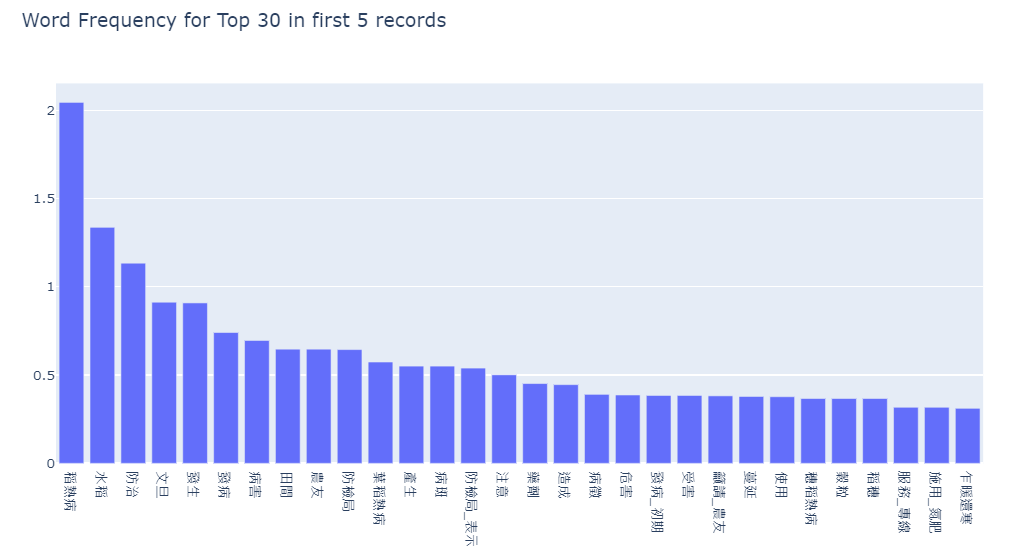

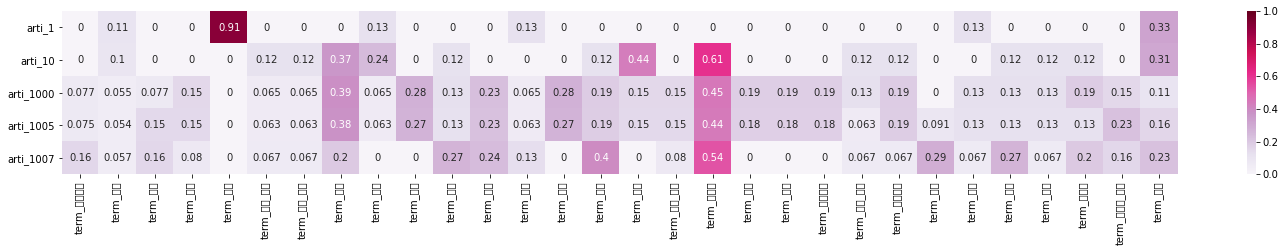

In [91]:
import seaborn as sns

# define the xyz of the heat map
plot_x = ["term_"+ str(i) for i in tfidf_vect.get_feature_names()]   # top 30 words
plot_y = ["arti_"+ str(i) for i in list(df_article.id)]              # first 5 articles/records
plot_z = words_tfidf.toarray()

# draw the heat map
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(25, 3))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)

In [92]:
# End of file